In [2]:
from alethia import (
    alethia,
    get_embeddings,
    load_sentence_transformer,
    do_pca,
    plot_embedding,
)

import pandas as pd

In [3]:
df = pd.read_csv(
    "~/github/pranav-alethia/notebooks/data_district_mappings/India_district_mappings - Sheet1.csv"
)
df

,State,1951,1961,1971,1981,1991,2001
0,Andaman and Nicobar Islands,Andaman and Nicobar,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman and Nicobar Islands
1,Andaman and Nicobar Islands,Andaman and Nicobar,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman,Andaman,Andaman
2,Andaman and Nicobar Islands,Andaman and Nicobar,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Nicobar,Nicobar,Nicobar
3,Andhra Pradesh,Srikakulam,Srikakulam,Srikakulam,Srikakulam,Srikakulam,Srikakulam
4,Andhra Pradesh,Srikakulam,Srikakulam,Srikakulam,Vizianagaram,Vizianagaram,Vizianagaram
...,...,...,...,...,...,...,...
631,West Bengal,Burdwan,Burdwan,Burdwan,Burdwan,Burdwan,Burdwan
632,West Bengal,Birbhum,Birbhum,Birbhum,Birbhum,Birbhum,Birbhum
633,West Bengal,Bankura,Bankura,Bankura,Bankura,Bankura,Bankura
634,West Bengal,Midnapur,Midnapore,Midnapore,Midnapore,Midnapore,Midnapore


In [4]:
model = load_sentence_transformer("Salesforce/SFR-Embedding-Mistral")

Loading model Salesforce/SFR-Embedding-Mistral


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Successfully loaded model: Salesforce/SFR-Embedding-Mistral


In [5]:
embeddings = get_embeddings(
    df["State"].unique().tolist(), model=model, show_progress=True
)

Generating Embeddings: 100%|██████████| 29/29 [00:02<00:00, 14.02it/s]


In [6]:
pca = do_pca(embeddings, n_components=2)

In [7]:
pca[0]

array([[ 3.2037027 ,  1.8753374 ,  2.2244918 , ...,  8.78096   ,
        -4.0516167 , -0.2309588 ],
       [ 6.414702  , -1.4188259 ,  3.639028  , ...,  7.3677454 ,
        -7.0216107 ,  3.1627395 ],
       [ 8.731812  ,  1.290672  ,  4.3069015 , ...,  9.412881  ,
        -3.7166533 , -0.19845618],
       ...,
       [ 8.0961485 , -1.0567504 ,  5.1069202 , ...,  6.733711  ,
        -5.649408  ,  0.92317814],
       [ 6.021009  , -4.0034814 ,  3.9825835 , ..., 12.447636  ,
        -5.7767057 ,  0.34741116],
       [ 4.4400787 ,  2.3409717 ,  2.1593041 , ...,  7.6520114 ,
        -3.7373037 ,  2.4561276 ]], shape=(29, 4096), dtype=float32)

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


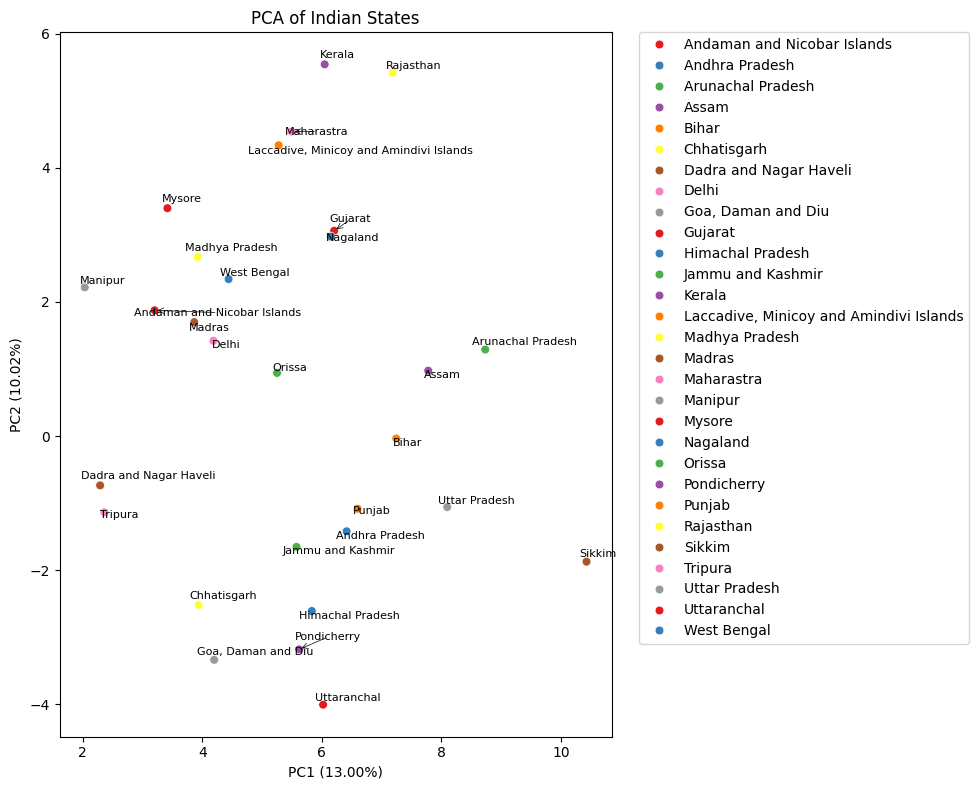

In [9]:
plot_embedding(
    X=pca[0],
    labels=df["State"].unique().tolist(),
    title="PCA of Indian States",
    explained_var=pca[1],
    label=True,
    repel=True,
)